In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3,suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Przygotowanie danych

In [62]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']

In [63]:
raw_dataset = pd.read_csv(url,names=column_names,na_values='?',comment='\t',sep=' ',skipinitialspace=True)

In [64]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [65]:
dataset.isna().sum()

MPG 0
Cylinders 0
Displacement 0
Horsepower 6
Weight 0
Acceleration 0
Model Year 0
Origin 0
dtype: int64

In [66]:
dataset = dataset.dropna()

In [67]:
dataset.isna().sum()

MPG 0
Cylinders 0
Displacement 0
Horsepower 0
Weight 0
Acceleration 0
Model Year 0
Origin 0
dtype: int64

In [68]:
dataset['Origin']=dataset['Origin'].map({1:'USA',2:'Europe',3:'Japan'})

In [69]:
dataset = pd.get_dummies(dataset,columns=['Origin'],prefix='',prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [70]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

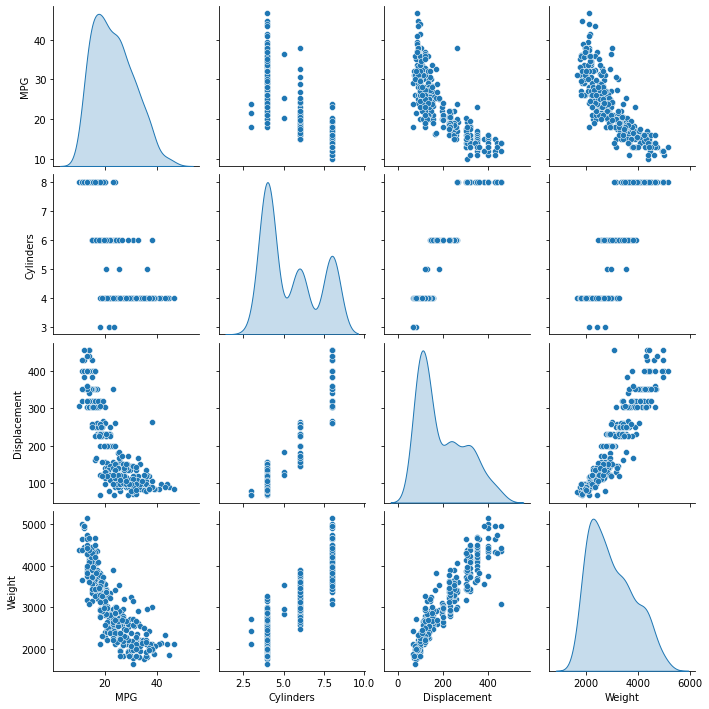

In [71]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']],diag_kind = 'kde')

In [72]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [73]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

train_dataset.describe().transpose()[['mean','std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [74]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [75]:
normalizer.adapt(np.array(train_features))

In [76]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [77]:
first = np.array(train_features[:1])
with np.printoptions(precision=2,suppress=True):
    print(f"pierwszy rekord (oryginalny): {first}")
    print(f"pierwszy rekord po normalizacji: {normalizer(first).numpy()}")

pierwszy rekord (oryginalny): [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]
pierwszy rekord po normalizacji: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


# Przypadek 1: regresja liniowa z jedną zmienną
<br>y = ax + b

In [78]:
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = layers.Normalization(input_shape=[1,],axis=None)
horsepower_normalizer.adapt(horsepower)

In [79]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [80]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 55ms/step


array([[ 0.313],
 [ 0.177],
 [-0.578],
 [ 0.439],
 [ 0.397],
 [ 0.156],
 [ 0.471],
 [ 0.397],
 [ 0.104],
 [ 0.177]], dtype=float32)

In [81]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error'
)

In [82]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 4.5 s, sys: 210 ms, total: 4.71 s
Wall time: 4.4 s


In [83]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.802932,4.195221,95
96,3.803896,4.184270,96
97,3.801662,4.196414,97
98,3.804097,4.203946,98
99,3.810968,4.203501,99


In [84]:
import matplotlib.pyplot as plt

In [85]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

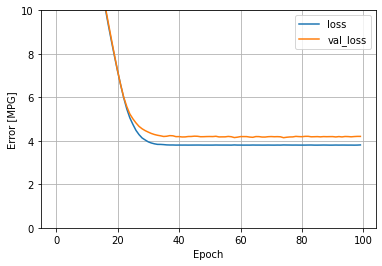

In [86]:
plot_loss(history)

In [87]:
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels,
    verbose=0
)

In [88]:
x = tf.linspace(0.0,250,251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 1ms/step


In [89]:
def plot_horsepower(x,y):
    plt.scatter(train_features['Horsepower'],train_labels,label='Data')
    plt.plot(x,y,color='k',label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

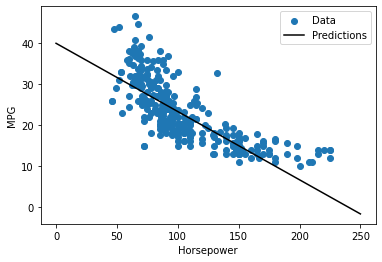

In [90]:
plot_horsepower(x,y)

# Przypadek 2: regresja liniowa z wieloma danymi wejściowymi

In [91]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_15 (Dense)            (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [92]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error'
)

In [93]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 4.16 s, sys: 152 ms, total: 4.31 s
Wall time: 4 s


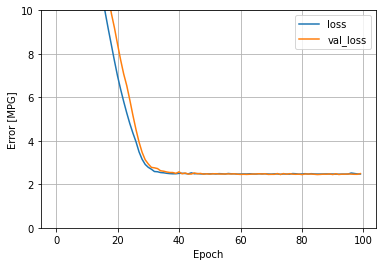

In [94]:
plot_loss(history)

In [95]:
test_results['linear_model'] = linear_model.evaluate(
    test_features,
    test_labels,
    verbose=0
)

# Przypadek 3: regresja z głęboką siecią neurnową (DNN)

In [109]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        # layers.Dense(128,activation='relu'),
        # layers.Dense(512,activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))
    return model

# Przypadek 3.1: regresja z użyciem DNN i pojedynczego wejścia

In [110]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [111]:
dnn_horsepower_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_26 (Dense)            (None, 64)                128       
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [112]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 4.42 s, sys: 200 ms, total: 4.62 s
Wall time: 4.27 s


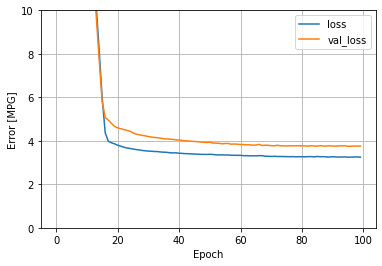

In [113]:
plot_loss(history)

In [114]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels,
    verbose=0
)

In [115]:
x = tf.linspace(0.0,250,251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 1ms/step


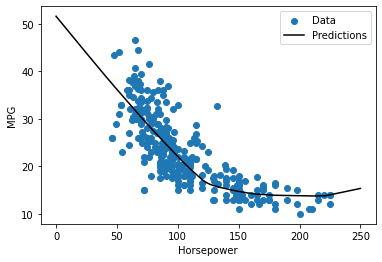

In [116]:
plot_horsepower(x,y)

# Przypadek 3.2: regresja z użyciem DNN i wielu danych wejściowych

In [117]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_29 (Dense)            (None, 64)                640       
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [118]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 4.47 s, sys: 233 ms, total: 4.7 s
Wall time: 4.33 s


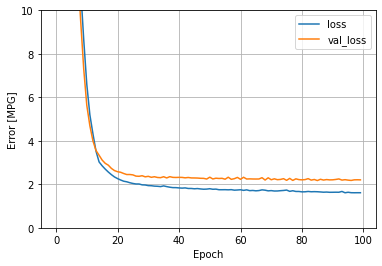

In [119]:
plot_loss(history)

In [120]:
test_results['dnn_model'] = dnn_model.evaluate(
    test_features,
    test_labels,
    verbose=0
)

In [121]:
pd.DataFrame(test_results,index=['Mean absolute Error[MPG]']).T

,Mean absolute Error[MPG]
horsepower_model,3.668878
linear_model,2.538641
dnn_horsepower_model,2.902780
dnn_model,1.746259
